In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
class bandit:
    
    def __init__(self,prob):
        self.prob = prob
        self.qValue = 0
        self.count = 0
        self.UCB = 0
        
    def pull(self):
        return np.random.random()<self.prob
    
    
    def update(self,reward):
        self.count = self.count + 1
        self.qValue = self.qValue + ( (reward - self.qValue)/self.count)
    
    def updateUCB(self,counts,N):
        self.UCB = self.qValue + np.sqrt(0.5*np.log(N)/counts)
            

In [44]:
############## UCB ALGORITHM ################
def UCB(UCBs):
    arm = np.argmax(UCBs)    
    return arm
      

Q values:  [0.28571428571428575, 0.5419847328244272, 0.7491762066444283]
Best arm out of 3 arm is:  3
num of times we've selected the bandits:  [28, 131, 99843]
total reward is:  74876.0
Win rate:  0.74876
UCBs:  [0.7391327589494385, 0.7516094926737138, 0.7567693118103117]


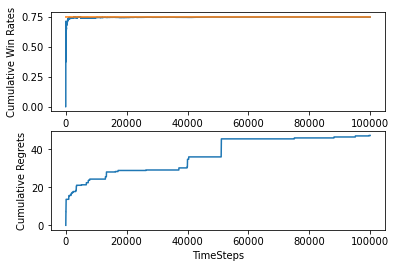

In [51]:
############ TEST CASE#################
NUM_TRIALS = 100000
banditsProbs = [0.2, 0.5, 0.75]
rewards = np.zeros(NUM_TRIALS)
regrets = np.zeros(NUM_TRIALS)


bandits = [bandit(x) for x in banditsProbs]
optimalArm = np.argmax([b.prob for b in bandits])

totalPlays=0
#init : for handling the log 0 and N=0 we pull each bandit once before running UCB1
for i in range(np.size(banditsProbs)):
    curReward = bandits[i].pull()
    totalPlays+=1
    bandits[i].update(curReward)
i=1
while i < NUM_TRIALS :
    arm = UCB([b.UCB for b in bandits])
    curReward = bandits[arm].pull()
    totalPlays+=1
    bandits[arm].update(curReward)
    [b.updateUCB(b.count,totalPlays) for b in bandits] 
    rewards[i] = curReward
    regrets[i] = banditsProbs[optimalArm] - banditsProbs[arm]
    i=i+1
    
    
    
bestArm = np.argmax([b.qValue for b in bandits])
print("Q values: " ,[b.qValue for b in bandits])
print("Best arm out of",len(bandits) ,"arm is: ", bestArm+1 )
print("num of times we've selected the bandits: ",[b.count for b in bandits])        
print("total reward is: ",rewards.sum())
print("Win rate: ",rewards.sum()/NUM_TRIALS)
print("UCBs: ",[bandits[0].UCB,bandits[1].UCB,bandits[2].UCB])
cumulativeRewards = np.cumsum(rewards)
winRates = cumulativeRewards/(np.arange(NUM_TRIALS)+1)

plt.subplot(2,1,1)
plt.plot(winRates)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Win Rates")
plt.plot(np.ones(NUM_TRIALS)*np.max(banditsProbs))

regrets = np.cumsum(regrets) #cumulative rewards loss due to the need of learning
plt.subplot(2,1,2)
plt.plot(regrets)
plt.xlabel("TimeSteps")
plt.ylabel("Cumulative Regrets")
plt.show()

In [48]:
np.sqrt(0.5*np.log(100000)/107)

0.2319455046471673